<a href="https://colab.research.google.com/github/cricgok/cricgok/blob/main/carPrice_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [41]:


import numpy as np # linear algebra
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt# data processing, CSV file I/O (e.g. pd.read_csv)

import os
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

In [42]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.neighbors import KNeighborsRegressor

In [43]:
df = pd.read_csv("CarPrice_Assignment.csv")

# Set display options to show all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
df


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,2952,ohc,four,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,188.8,68.8,55.5,3049,ohc,four,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3012,ohcv,six,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,188.8,68.9,55.5,3217,ohc,six,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [44]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [45]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [46]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [47]:
df.duplicated().sum()

0

## Univariate analysis

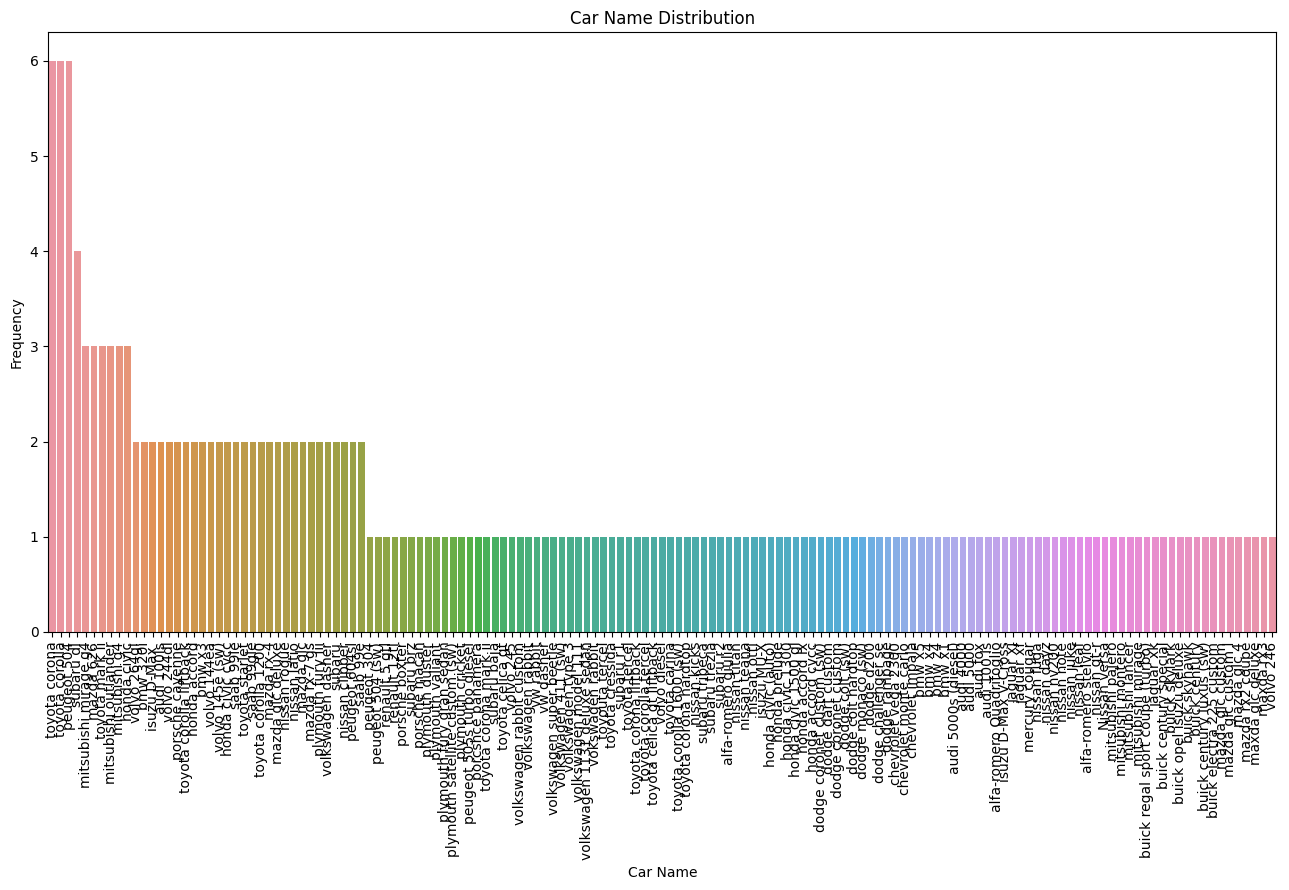

In [48]:
plt.figure(figsize=(13, 9))  # Adjust the figure size as needed
sns.countplot(data=df, x="CarName", order=df["CarName"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels

# Adding labels and title
plt.xlabel("Car Name")
plt.ylabel("Frequency")
plt.title("Car Name Distribution")

# Show the plot
plt.tight_layout()
plt.show()

(array([0, 1]), [Text(0, 0, 'gas'), Text(1, 0, 'diesel')])

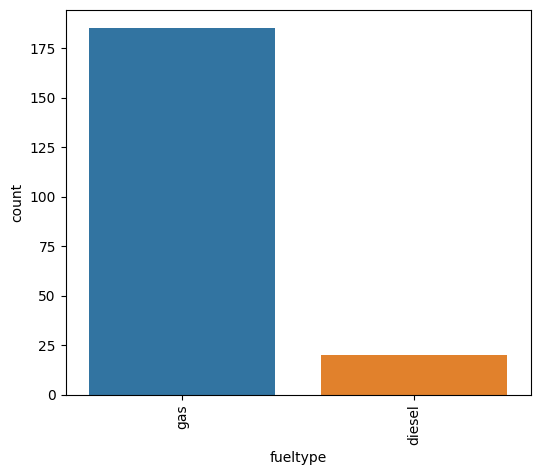

In [49]:
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
sns.countplot(data=df, x="fueltype", order=df["fueltype"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels

(array([0, 1]), [Text(0, 0, 'std'), Text(1, 0, 'turbo')])

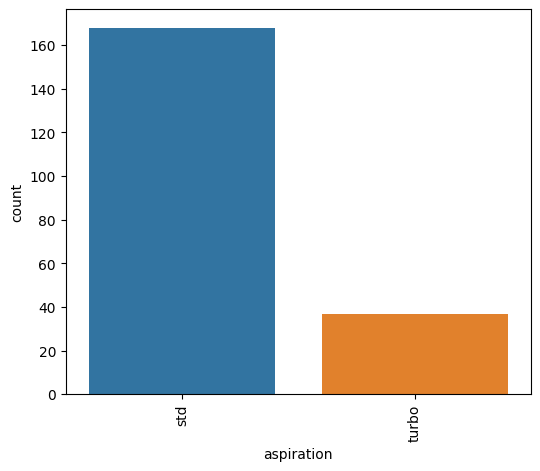

In [50]:
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
sns.countplot(data=df, x="aspiration", order=df["aspiration"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels

(array([0, 1]), [Text(0, 0, 'four'), Text(1, 0, 'two')])

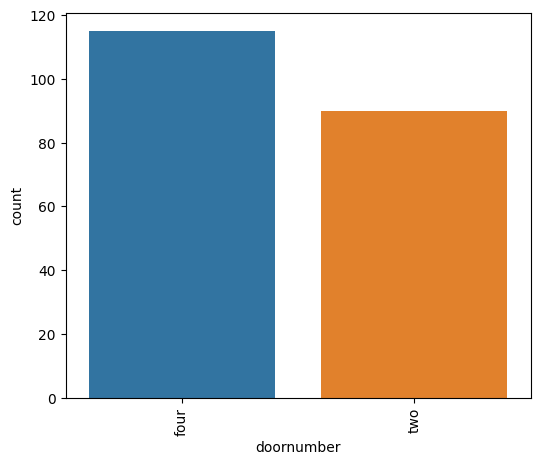

In [51]:
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
sns.countplot(data=df, x="doornumber", order=df["doornumber"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'sedan'),
  Text(1, 0, 'hatchback'),
  Text(2, 0, 'wagon'),
  Text(3, 0, 'hardtop'),
  Text(4, 0, 'convertible')])

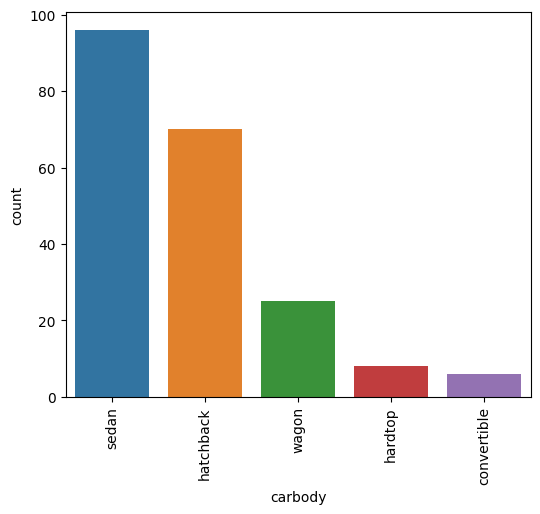

In [52]:
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
sns.countplot(data=df, x="carbody", order=df["carbody"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels

(array([0, 1, 2]), [Text(0, 0, 'fwd'), Text(1, 0, 'rwd'), Text(2, 0, '4wd')])

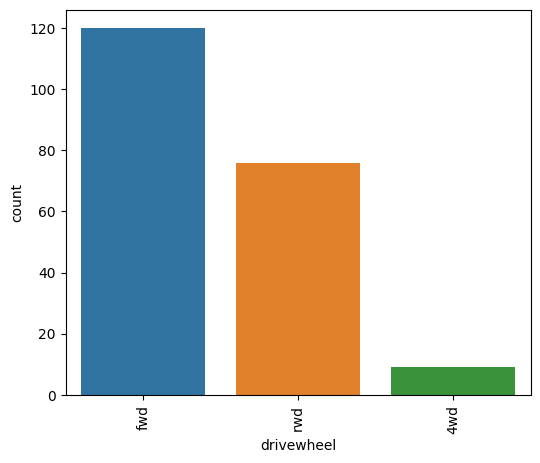

In [53]:
plt.figure(figsize=(6, 5))  # Adjust the figure size as needed
sns.countplot(data=df, x="drivewheel", order=df["drivewheel"].value_counts().index)
plt.xticks(rotation=90, fontsize=10)  # Rotate and adjust x-axis labels

<ipython-input-54-ea72122d0bd0>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


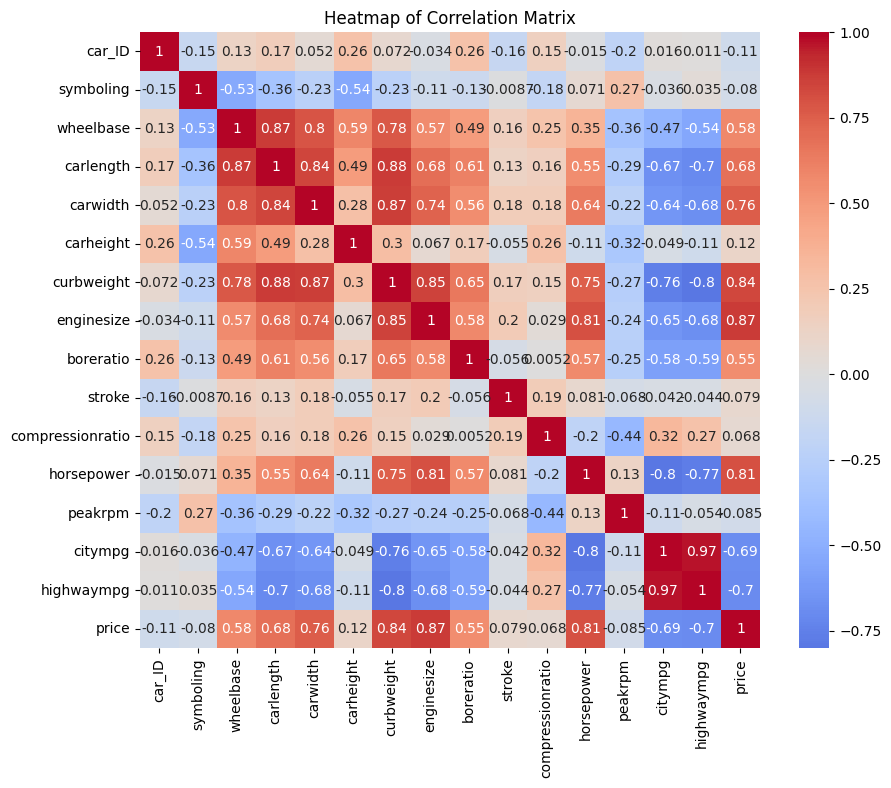

In [54]:
correlation_matrix = df.corr()

# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Heatmap of Correlation Matrix')
plt.show()

In [55]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


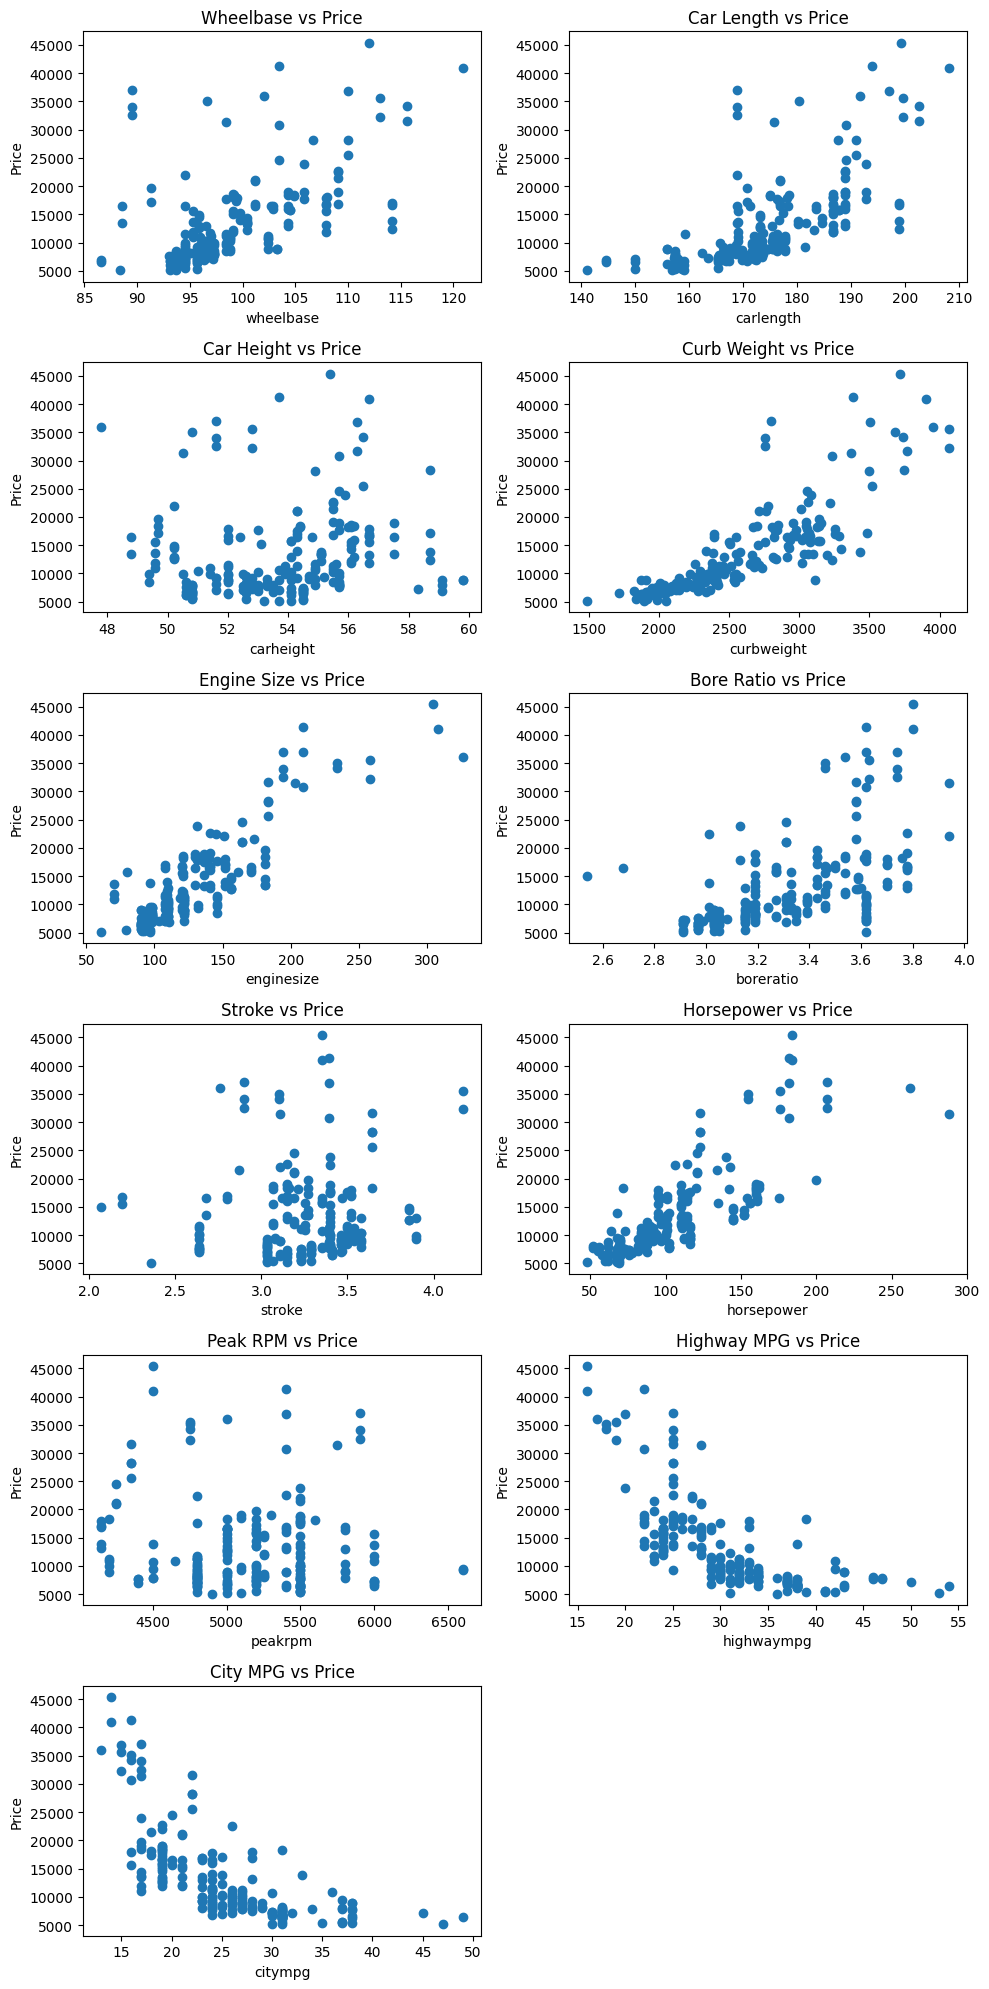

In [56]:
def scatter(x, title, fig):
    plt.subplot(6, 2, fig)
    plt.scatter(df[x], df['price'])
    plt.title(title + ' vs Price')
    plt.ylabel('Price')
    plt.xlabel(x)

plt.figure(figsize=(10, 20))

scatter('wheelbase', 'Wheelbase', 1)
scatter('carlength', 'Car Length', 2)
scatter('carheight', 'Car Height', 3)
scatter('curbweight', 'Curb Weight', 4)
scatter('enginesize', 'Engine Size', 5)
scatter('boreratio', 'Bore Ratio', 6)
scatter('stroke', 'Stroke', 7)
scatter('horsepower', 'Horsepower', 8)
scatter('peakrpm', 'Peak RPM', 9)
scatter('highwaympg', 'Highway MPG', 10)
scatter('citympg', 'City MPG', 11)  # Change '11' to '1' or '2' based on your desired position

plt.tight_layout()
plt.show()


City MPG and highway MPG exhibit a negative correlation with price, whereas horsepower, engine size, bore ratio, wheelbase, car length, curb weight, and curb height show a positive correlation with price. These attributes are noteworthy, and no other correlations are present.😊😊

In [57]:
df.drop(columns=["car_ID","peakrpm","stroke","carheight"],inplace=True)

In [58]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [59]:
en = LabelEncoder()
catCols = ['CarName','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']
for cols in catCols:
    df[cols] = en.fit_transform(df[cols])

In [60]:
df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg,price
0,3,2,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,9.0,111,21,27,13495.0
1,3,3,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,9.0,111,21,27,16500.0
2,1,1,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,9.0,154,19,26,16500.0
3,2,4,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,10.0,102,24,30,13950.0
4,2,5,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,8.0,115,18,22,17450.0


In [61]:
X = df.drop("price",axis = 1)
y = df["price"]

In [62]:
X.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,compressionratio,horsepower,citympg,highwaympg
0,3,2,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,9.0,111,21,27
1,3,3,1,0,1,0,2,0,88.6,168.8,64.1,2548,0,2,130,5,3.47,9.0,111,21,27
2,1,1,1,0,1,2,2,0,94.5,171.2,65.5,2823,5,3,152,5,2.68,9.0,154,19,26
3,2,4,1,0,0,3,1,0,99.8,176.6,66.2,2337,3,2,109,5,3.19,10.0,102,24,30
4,2,5,1,0,0,3,0,0,99.4,176.6,66.4,2824,3,1,136,5,3.19,8.0,115,18,22


In [63]:
y.head()

0    13495.0
1    16500.0
2    16500.0
3    13950.0
4    17450.0
Name: price, dtype: float64

In [64]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=4)


In [65]:
from sklearn.preprocessing import StandardScaler

# Create a MinMaxScaler instance
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
X_train = scaler.fit_transform(X_train)

# Transform the test data using the same scaler
X_test = scaler.transform(X_test)



In [66]:
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, BaggingRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

In [67]:
def train_regressor(regressor, X_train, y_train, X_test, y_test):
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)

    r2 = regressor.score(X_test, y_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    return r2, mse, mae
regressors = {
    "SVR": SVR(kernel='linear', C=1),
    "KNeighborsRegressor": KNeighborsRegressor(n_neighbors=5),
    "DecisionTreeRegressor": DecisionTreeRegressor(max_depth=5),
    "Ridge": Ridge(alpha=1.0),
    "RandomForestRegressor": RandomForestRegressor(n_estimators=200,max_depth=3 ,random_state=2),
    "AdaBoostRegressor": AdaBoostRegressor(n_estimators=100, random_state=2),
    "BaggingRegressor": BaggingRegressor(n_estimators=100, random_state=2),
    "ExtraTreesRegressor": ExtraTreesRegressor(n_estimators=100, random_state=2),
    "GradientBoostingRegressor": GradientBoostingRegressor(learning_rate= 0.2,  min_samples_leaf= 4, min_samples_split= 5, n_estimators=100),
    "XGBRegressor": XGBRegressor(n_estimators=100, random_state=2)
}


# Lists to store metrics
algorithm_names = []
r2_scores = []
mse_scores = []
mae_scores = []

# Train and evaluate each regressor
for name, regressor in regressors.items():
    r2, mse, mae = train_regressor(regressor, X_train, y_train, X_test, y_test)

    algorithm_names.append(name)
    r2_scores.append(r2)
    mse_scores.append(mse)
    mae_scores.append(mae)

# Create a DataFrame to store the results
results_df = pd.DataFrame({
    'Algorithm': algorithm_names,
    'R2 Score': r2_scores,
    'Mean Squared Error': mse_scores,
    'Mean Absolute Error': mae_scores
})

display(results_df)



,Algorithm,R2 Score,Mean Squared Error,Mean Absolute Error
0,SVR,-0.121589,5.598468e+07,5266.610617
1,KNeighborsRegressor,0.857828,7.096604e+06,2063.990476
2,DecisionTreeRegressor,0.846876,7.643249e+06,2028.076105
3,Ridge,0.846768,7.648635e+06,2220.268551
4,RandomForestRegressor,0.833496,8.311119e+06,2027.620255
5,AdaBoostRegressor,0.899744,5.004332e+06,1684.996219
6,BaggingRegressor,0.904408,4.771540e+06,1305.606825
7,ExtraTreesRegressor,0.911473,4.418865e+06,1565.243414
8,GradientBoostingRegressor,0.944083,2.791147e+06,1238.373243
9,XGBRegressor,0.913827,4.301364e+06,1173.013346


**THANK YOU**